In [809]:


# Importing and Understanding Data
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm  

# import VIF to calculate VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [810]:
df = pd.read_csv('/Users/sudheendragogi/AI_ML/ML/BikeSharing/day.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [811]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [812]:
df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [813]:
# Handling undesired columns in data set
# Drop instant which is a sequence or serial number of rows in dataset, dteday which shows the date, casual and registered which are distributed values of count data. 
# Rename the attributes in dataset


#df.head()
df=df.drop(['instant','dteday','casual','registered'],axis=1)
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
df.columns
 



Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [814]:
# Translate Season numerics to string labels.
df.season = df.season.map({1:'Spring', 2:'Summer',3:'Fall',4:'Winter'})
df

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [815]:
# Translate Month numerics to string labels.

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,dec,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,dec,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,dec,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,dec,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [816]:
# Translate weekday numerics to string labels.
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,jan,0,sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,dec,0,thu,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,dec,0,fri,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,dec,0,sat,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,dec,0,sun,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [817]:
# Translate weathersit numerics to string labels.
df.weathersit = df.weathersit.map({1: 'Clear', 2: 'Misty',3:'Light Rain',4:'Heavy Rain'})
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualize Data to review the association between the predictor variables and observe if there is any mnulti conlinearity between predictors. 

<AxesSubplot:ylabel='temp'>

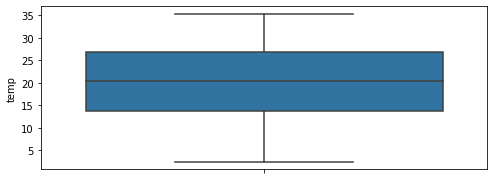

In [818]:
#Outlier detection, below there are no outliers that needs to be treated

cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(8,3))
sns.boxplot(y = 'temp', data = df)


<AxesSubplot:ylabel='atemp'>

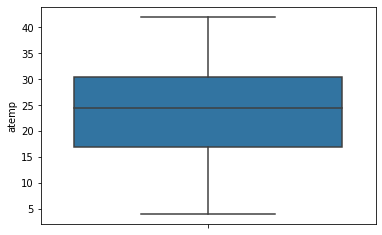

In [819]:
sns.boxplot(y = 'atemp', data = df)


<AxesSubplot:ylabel='humidity'>

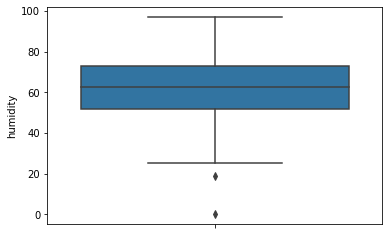

In [820]:
sns.boxplot(y = 'humidity', data = df)


<AxesSubplot:ylabel='windspeed'>

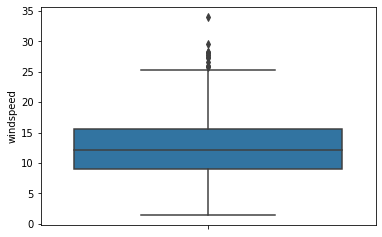

In [821]:
sns.boxplot(y = 'windspeed', data = df)

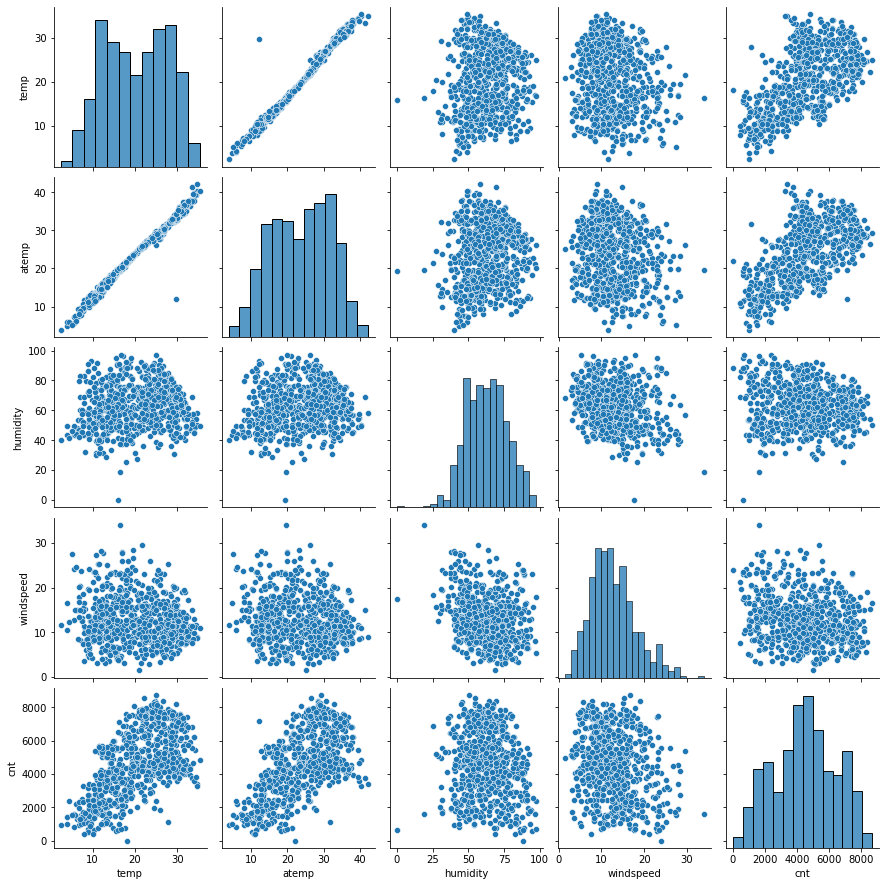

In [822]:
# draw pairplot for numerics to identify any co-relations in predictors
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

Temp and Atemp have corelation with count variable
Also Temp and Atemp have corelation among themselves 

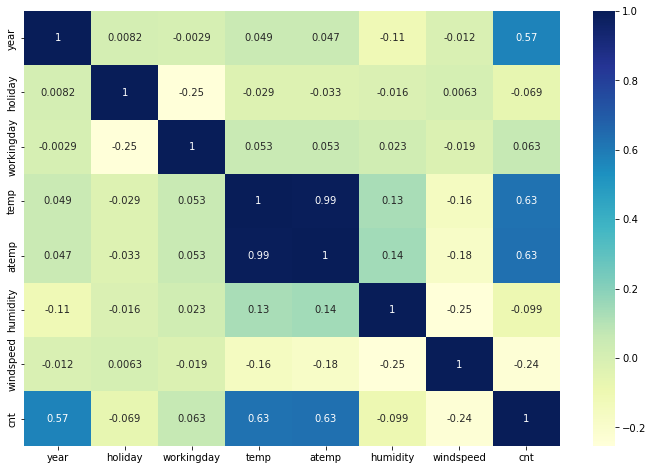

In [823]:
# Calculate the co relation coeffcients using heatmap
# From the below heatmap, we can conclude that atemp and temp are highly corelated (0.99) and co-linearity exists among them, hence can not be used to predict target variable. 
#we have to use VIF, P-value to determine the variables
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

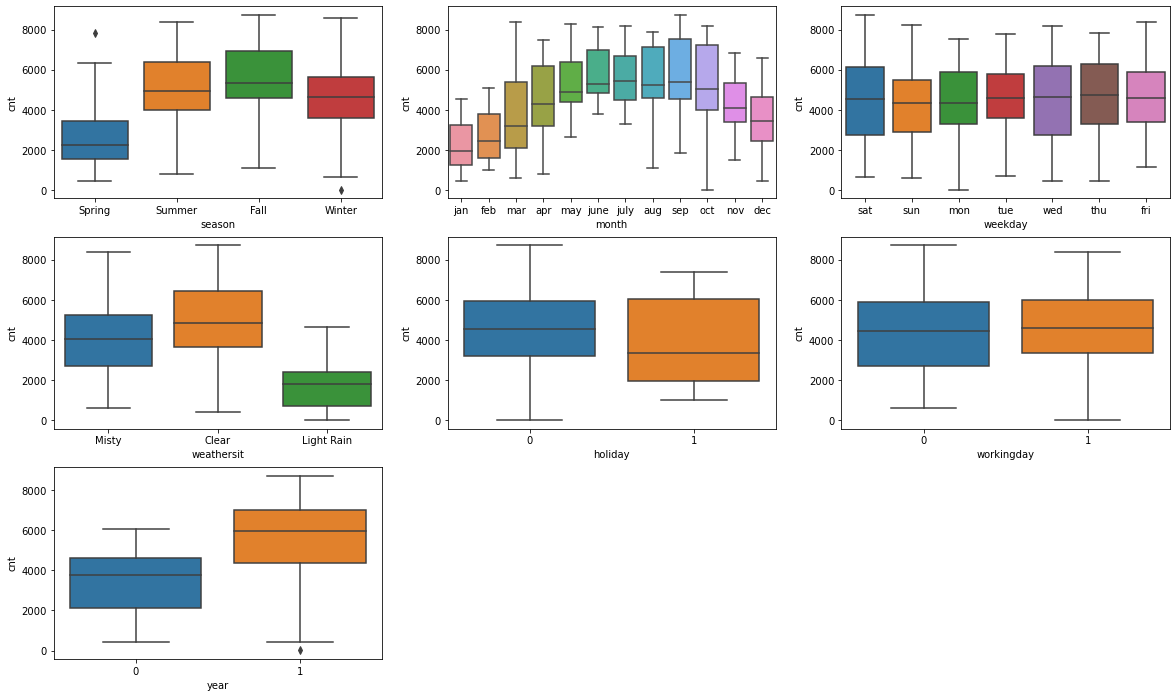

In [824]:
# visualize data for categorical variables
# 
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

Data Analysis-

From above plots, Fall Season has highest demand and the demand increases until june and decreasing after september month with september has highest demand
Clear weather, week days are affecting factors.
Demand has increased for next year compared to current year

In [825]:
# creating dummy values for all categorical variables

df = pd.get_dummies(data=df,columns=["season","month","weekday","weathersit"],drop_first=True)
df.head()
df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light Rain',
       'weathersit_Misty'],
      dtype='object')

Build Model
    Split the dataset into test and train
    Perform Scaling of features using min max, scaling is an essential activity to harmonize the numeric values across the data set
    Re check the co-relation using heat map


In [826]:
#Split the dataset into test and train
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.3, random_state = 100)
df_train.shape


(510, 30)

In [827]:
#verify test data

df_test.shape

(219, 30)

In [828]:
# perform scaling using MinMaxScaler to Rescale features
scaler = MinMaxScaler()

In [829]:
# verify data before scaling.
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Spring,season_Summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [830]:
# Perform scaling to desired columns (exclude one hot encoded columns)

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Spring,season_Summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


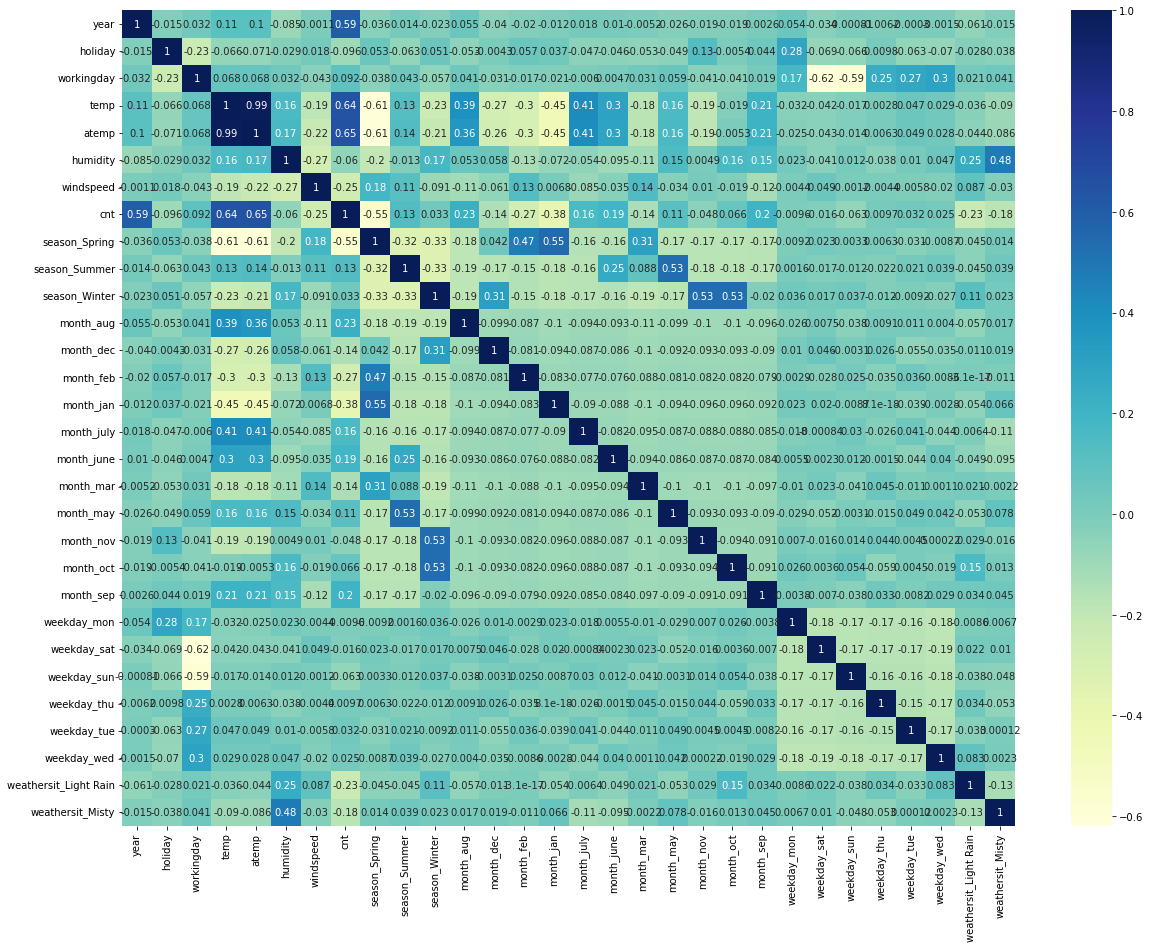

In [831]:
# Evaluate co-relation between coefficients using heat map on the training data
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

With above heat map, we can see that features year and temp has co-realtion with target cnt

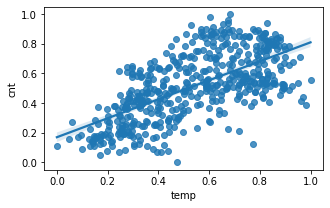

In [832]:
plt.figure(figsize=(5,3))
sns.regplot(data=df_train,y="cnt",x="temp")
plt.show()

Split the data into X and y sets

In [833]:
y_train = df_train.pop('cnt')
X_train = df_train

In [834]:
# using Recursive feature elimination , build and run the RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=12)         
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 4),
 ('season_Winter', False, 3),
 ('month_aug', False, 11),
 ('month_dec', False, 7),
 ('month_feb', False, 8),
 ('month_jan', False, 5),
 ('month_july', True, 1),
 ('month_june', False, 16),
 ('month_mar', False, 18),
 ('month_may', False, 10),
 ('month_nov', False, 6),
 ('month_oct', False, 14),
 ('month_sep', False, 2),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 17),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Misty', True, 1)]

In [835]:
# review the selected variable by RFE module

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_Spring', 'month_july', 'weekday_sat', 'weekday_sun',
       'weathersit_Light Rain', 'weathersit_Misty'],
      dtype='object')


In [836]:
# review the unselected variable by RFE module

#col = X_train.columns[~rfe.support_]
# print(col)

In [837]:
# Derive VIF of variables using a function
from statsmodels.stats.outliers_influence import variance_inflation_factor
def EvaluateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [838]:
# create a new dataframe that holds RFE columns

X_train_rfe = X_train[col]

In [839]:
EvaluateVIF(X_train_rfe)

,Features,VIF
2,workingday,36.02
8,weekday_sat,8.79
9,weekday_sun,8.57
1,holiday,2.31
3,temp,2.01
4,humidity,1.82
6,season_Spring,1.64
11,weathersit_Misty,1.54
7,month_july,1.26
10,weathersit_Light Rain,1.24


In [840]:

# Iteration-1 : Building linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          5.60e-185
Time:                        15:17:40   Log-Likelihood:                 493.57
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [841]:
# As workingday shows high VIF value hence we can drop it and build a new model
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Evaluate VIF for the new model
EvaluateVIF(X_train_new)

,Features,VIF
3,humidity,15.40
2,temp,11.52
4,windspeed,3.94
10,weathersit_Misty,2.13
0,year,2.03
5,season_Spring,1.84
6,month_july,1.36
7,weekday_sat,1.22
8,weekday_sun,1.22
9,weathersit_Light Rain,1.20


In [842]:
# Iteration-2 : Building linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          5.60e-185
Time:                        15:17:41   Log-Likelihood:                 493.57
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [843]:
# As humidity shows high VIF value hence we can drop it and build a new model
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Evaluate VIF for the new model
EvaluateVIF(X_train_new)

,Features,VIF
2,temp,4.32
3,windspeed,3.84
0,year,2.03
4,season_Spring,1.53
9,weathersit_Misty,1.48
5,month_july,1.28
6,weekday_sat,1.21
7,weekday_sun,1.19
8,weathersit_Light Rain,1.06
1,holiday,1.04


In [844]:
# Iteration-3 : Building linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.75e-184
Time:                        15:17:41   Log-Likelihood:                 489.55
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     499   BIC:                            -910.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [845]:
# WDrop week day sat A IT has high p-value
X_train_new = X_train_new.drop(['weekday_sat'], axis = 1)

# Run the function to calculate VIF for the new model
EvaluateVIF(X_train_new)

,Features,VIF
2,temp,4.26
3,windspeed,3.78
0,year,2.03
4,season_Spring,1.53
8,weathersit_Misty,1.48
5,month_july,1.28
6,weekday_sun,1.16
7,weathersit_Light Rain,1.06
1,holiday,1.03


In [846]:
# Iteration-4 : Building linear regression model
# 
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.89e-185
Time:                        15:17:41   Log-Likelihood:                 488.93
No. Observations:                 510   AIC:                            -957.9
Df Residuals:                     500   BIC:                            -915.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [847]:
lr_4.params

const                    0.316250
year                     0.234657
holiday                 -0.094013
temp                     0.403869
windspeed               -0.159654
season_Spring           -0.147006
month_july              -0.082642
weekday_sun             -0.046756
weathersit_Light Rain   -0.278049
weathersit_Misty        -0.082305
dtype: float64

In [848]:
y_train_pred = lr_4.predict(X_train_lm_4)

<AxesSubplot:ylabel='Density'>

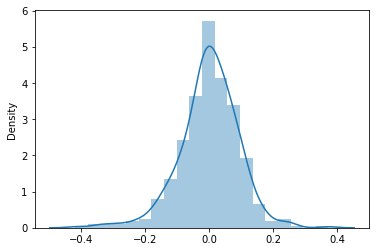

In [849]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)


VIF and P values are under acceptance criteria, we can perform residual analysis on training data and see the error distribution

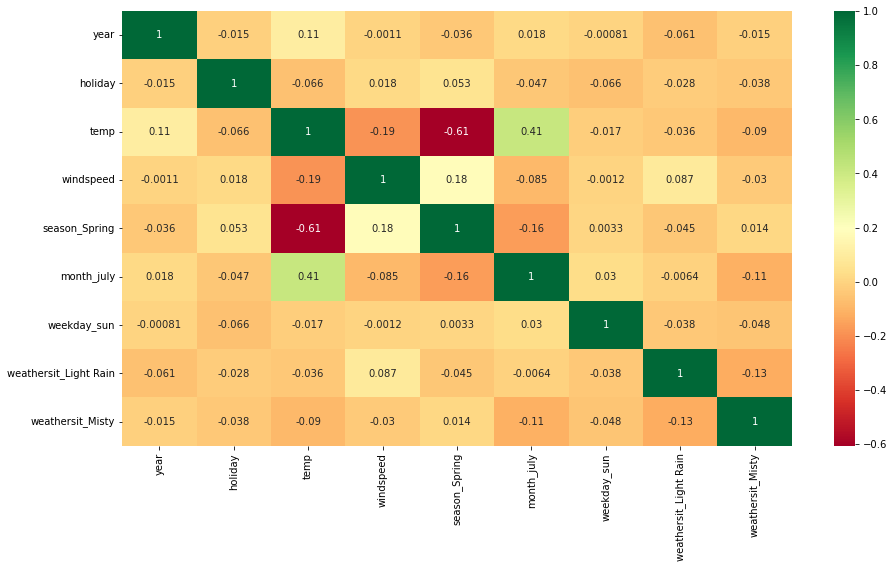

In [850]:
#check multi colinearity
# 
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

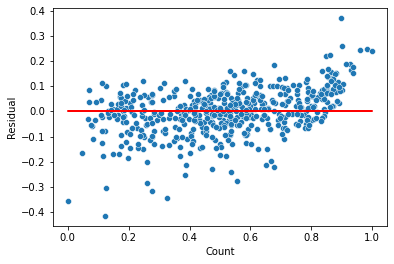

In [851]:
# check homoscdasticity to find any visibe patterns

y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [852]:
# Perform scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Spring,season_Summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [853]:
y_test = df_test.pop('cnt')
X_test = df_test

In [854]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [855]:
y_pred = lr_4.predict(X_test_lm_4)

In [856]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8036

Text(0, 0.5, 'y_pred')

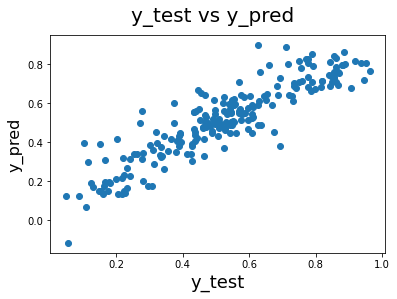

In [857]:
# Review the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [858]:
round(lr_4.params,4)

const                    0.3163
year                     0.2347
holiday                 -0.0940
temp                     0.4039
windspeed               -0.1597
season_Spring           -0.1470
month_july              -0.0826
weekday_sun             -0.0468
weathersit_Light Rain   -0.2780
weathersit_Misty        -0.0823
dtype: float64

cnt = 0.3163 + 0.2347 * year -0.0940*holday + 0.4039 * temp -0.1597 * windspeed -0.1470 * season_Spring  -0.0826 * month_july  - -0.0468 * weekday_sun  -0.2780* weathersit_Light  -0.0823* Rain weathersit_Misty     

In [859]:
# adjusted r2

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7952


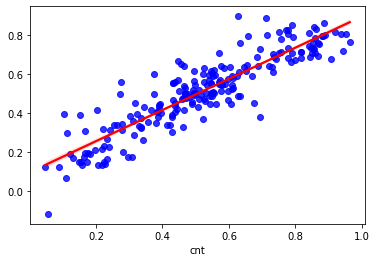

In [860]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.show()

Train dataset R^2 =  0.829
Train dataset Adjusted R^2 = 0.826
Test dataset R^2 = 0.8036
Test dataset Adjusted R^2 = 0.7952

Parameters affecting the demand for bikes -
year
holiday
temp 
windspeed
season_Spring
month_july   
weekday_sun  
weathersit_Light Rain
weathersit_Misty   